## 什么是决策树

决策树模型和逻辑回归模型的差别如下图：

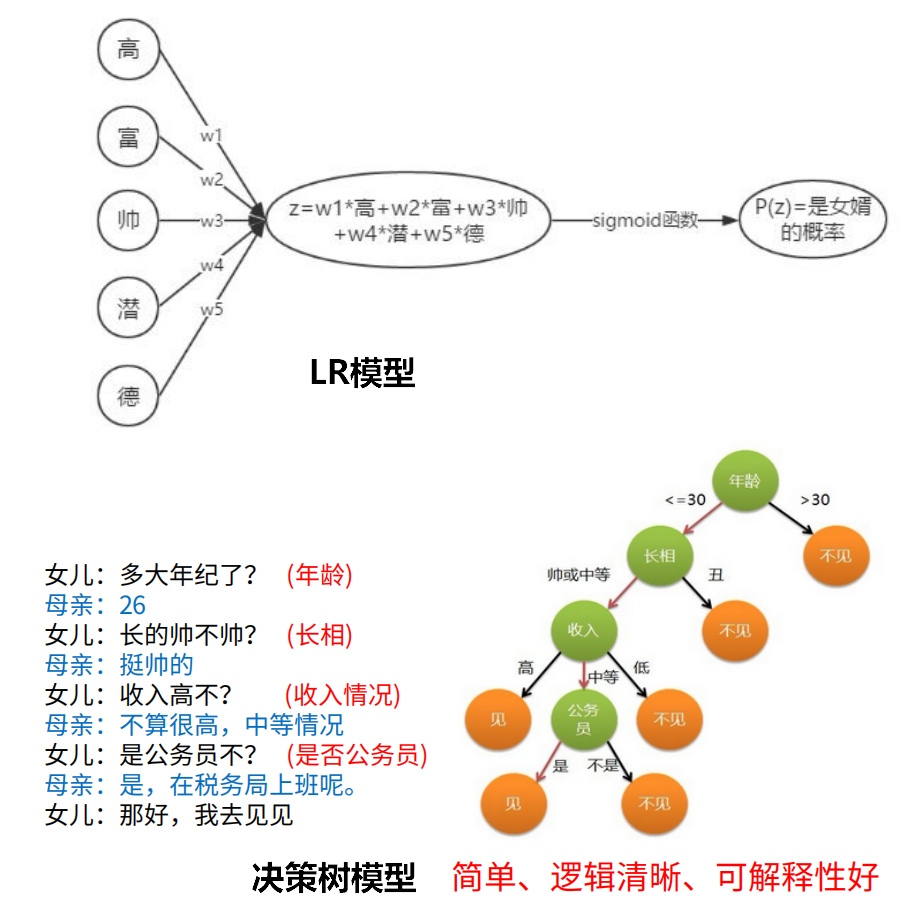

决策树更多像是条件筛选if-else的组合。

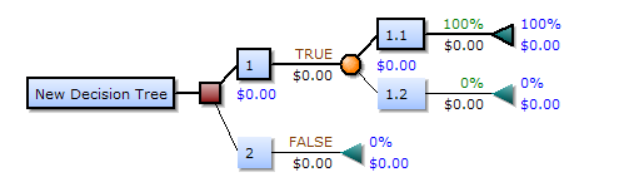

决策树可以看做：
1. 决策节点：用矩形框表示
2. 机会节点：用圆圈表示
3. 终结节点：三角形表示

所以为了正确的到达终结节点，就在于每个机会节点做出来的决策是否合理。
决策树就是如何生成决策树，以及决策树中的节点。

决策树的算法
- ID3
- C4.5
- CART

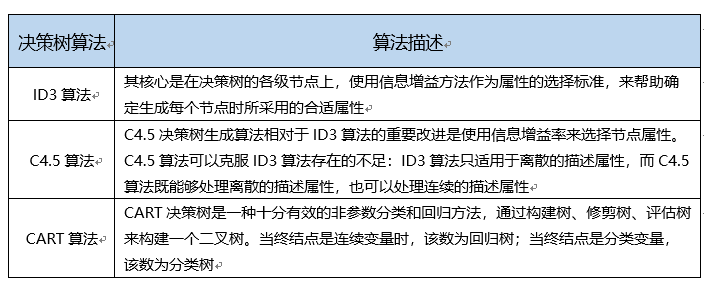

信息增益的计算方式为$g(D, A) = H(D) - H(D|A)$

$H(D)$为集合的信息熵, $H(D|A)$ 在给定集合D中A的信息熵。

其中$H(D)$的计算公式为:

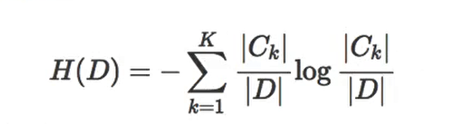

$H(D|A)$的计算公式为

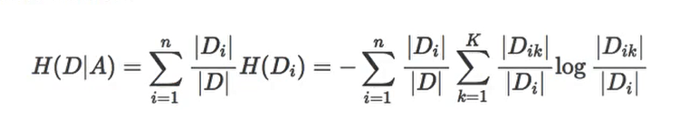

以下面的例子为例，根据年龄(A1)、工作(A2)、房子(A3)、信贷情况(A4)判断是否存在贷款

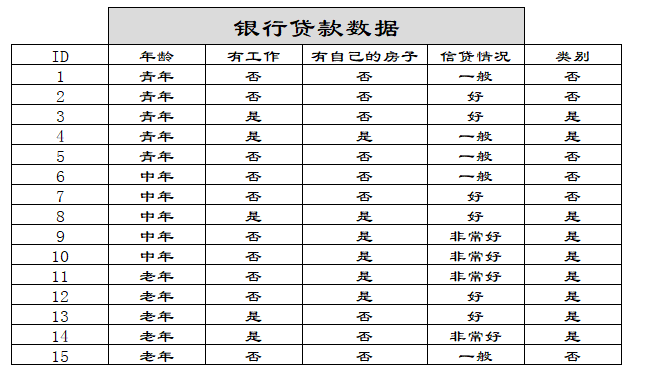

总样本来为15, 其中存在贷款的为9

则$H(D) = - \frac {9} {15} log \frac {9} {15} - \frac {6} {15} log \frac {6} {15} = 0.2922$

年龄的存在(青年、中年、老年) 每类5个样本

则$g(D, A1) = H(D) - [\frac 5 {15} H(D1) + \frac 5 {15} H(D2) + \frac 5 {15} H(D3)]$

同样为了计算$H(D1)$ 则在青年中总计5个案例，其中2个为存在贷款则$H(D1) = -\frac {2} {5} log \frac {2} {5} -\frac {3} {5} log \frac {3} {5}$

计算出信息增益之后减序排列，则假设信息增益排序为 房子 > 工作， 则可以构造出如下的决策树。
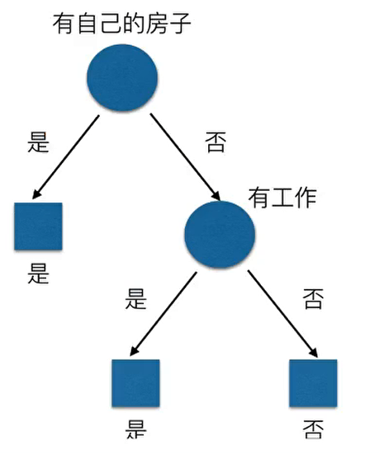


使用决策树并不需要归一, 缺点：决策树容易过拟合



In [69]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz


data = pd.read_csv("./data/DecisionTree.csv")
print(data.columns, data.shape)
print(data.head(2))
data.info()

feature_columns = [u'workclass', u'education', u'marital-status', u'occupation', u'relationship', u'race', u'gender', u'native-country']
label_column = ['income']

features = data[feature_columns]
labels = data[label_column]

features = pd.get_dummies(features)
# print(features.head(3))
clf = DecisionTreeClassifier(criterion='gini', max_depth=4)
clf = clf.fit(features.values, labels.values)
clf.predict(features.values)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object') (32561, 9)
           workclass   education       marital-status        occupation  \
0          State-gov   Bachelors        Never-married      Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse   Exec-managerial   

     relationship    race gender  native-country  income  
0   Not-in-family   White   Male   United-States   <=50K  
1         Husband   White   Male   United-States   <=50K  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       32561 non-null  object
 1   education       32561 non-null  object
 2   marital-status  32561 non-null  object
 3   occupation      32561 non-null  object
 4   relationship    32561 non-null  object
 5   race    

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

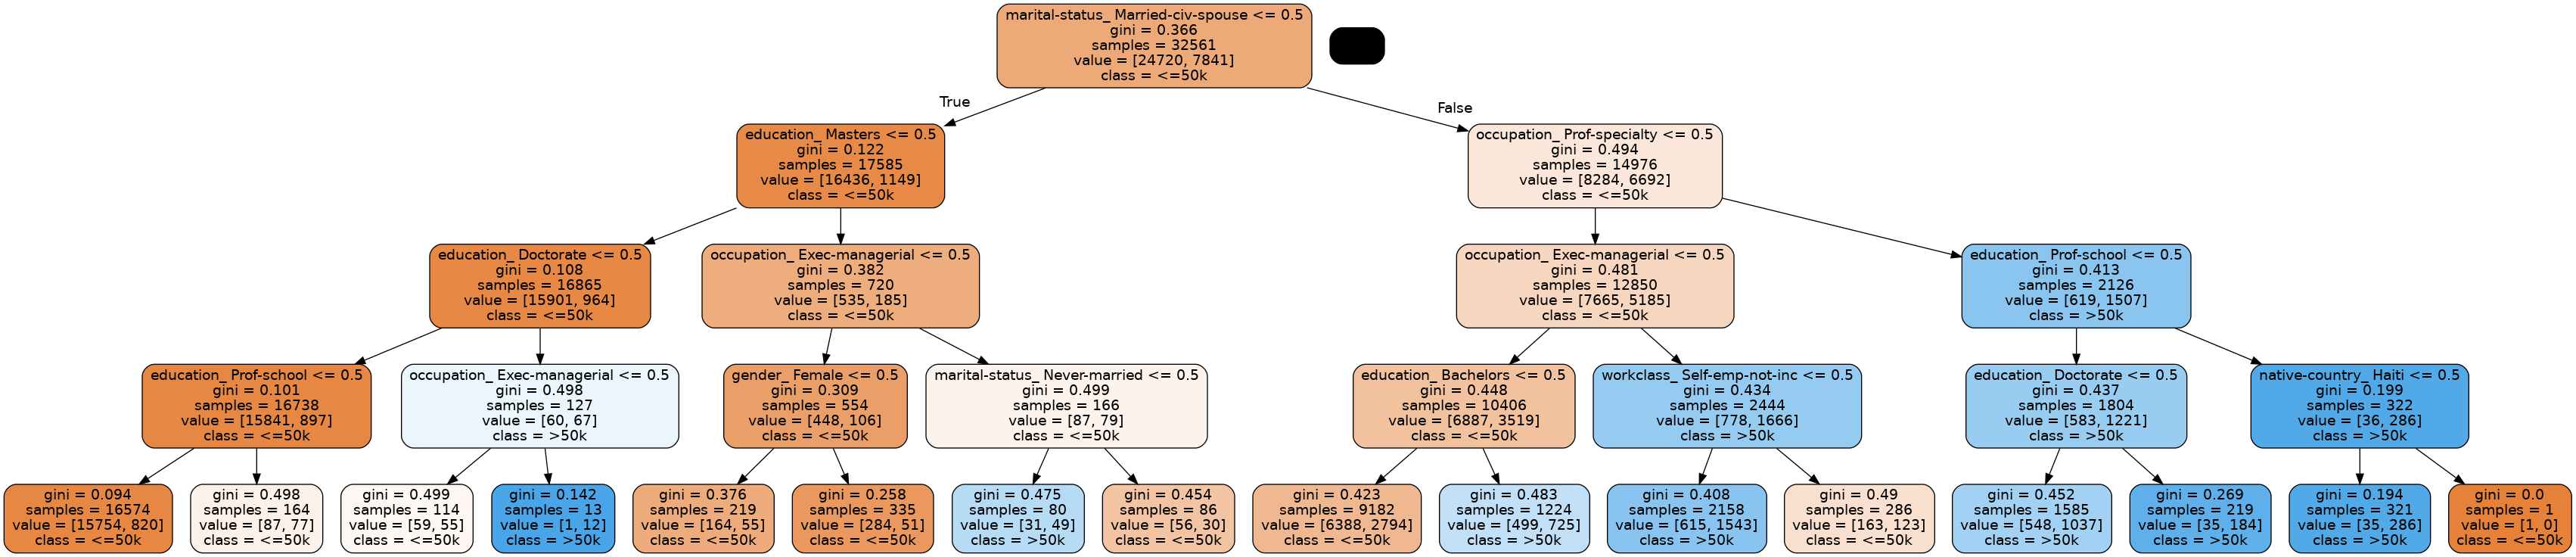

In [70]:
import pydotplus
from IPython.display import display, Image
dot_data = export_graphviz(clf,
                            out_file=None,
                            feature_names=features.columns,
                            class_names = ['<=50k', '>50k'],
                            filled = True,
                            rounded =True
                        )
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))